In [1]:
import torch
import torch.nn as nn
import torchvision
import torch.utils.data as data
import torchvision.transforms as transforms
import torch.nn.functional as F
import utils
import warnings
import model_1
import random
import os
import shutil
warnings.filterwarnings("ignore")

In [2]:
seed = 3
random.seed(seed)
torch.manual_seed(seed)
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

In [4]:
AB_scale = 128
width = height = 128
batch_size = 32
datasets = ['anime','doberman','mariposas', 'landscapes']
indice_dataset = 3

In [5]:
img_transform = transforms.Compose([transforms.ToTensor()]) 
dataset = utils.LabDataSet(f'data/{datasets[indice_dataset]}_{width}',
                img_transform, train_size=6900, test_size=229, height=height, width=width, seed=seed)

In [6]:
train_loader = torch.utils.data.DataLoader(dataset=dataset.train_set, batch_size=batch_size, shuffle=True)
test_loader = torch.utils.data.DataLoader(dataset=dataset.test_set, batch_size=batch_size, shuffle=False)

In [7]:
learning_rate = 1e-3
autoencoder = model_1.Autoencoder()
autoencoder.to(device)

loss = nn.MSELoss()
optimizer = torch.optim.Adam(params=autoencoder.parameters(), lr=learning_rate)

autoencoder.train()
train_loss_result, test_loss_result = utils.train(device,autoencoder,train_loader,test_loader,50,loss, optimizer, height, width)

Epoch [1 / 50] average train error: 0.012331, average test error: 0.012075


KeyboardInterrupt: 

In [8]:
utils.save_model(device, autoencoder, "mariposas_128_arch1", train_loss_result, test_loss_result, train_loader, test_loader, height=height, width=width)

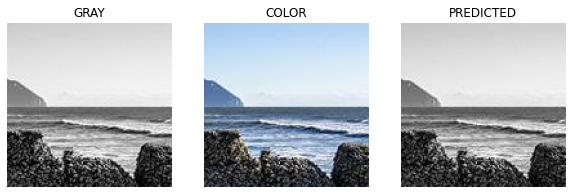

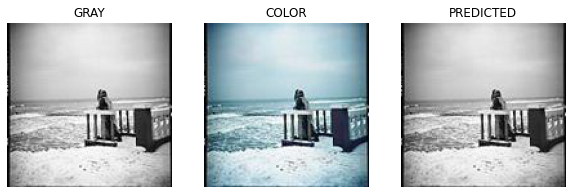

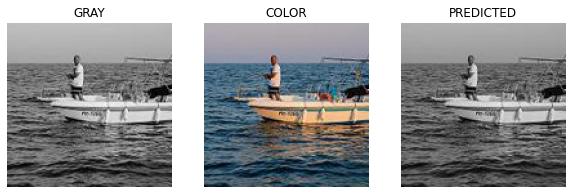

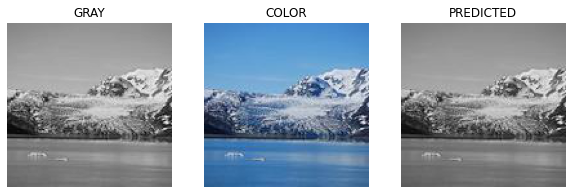

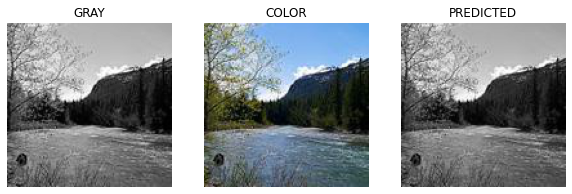

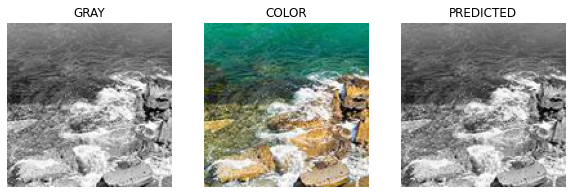

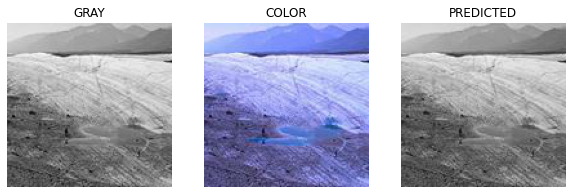

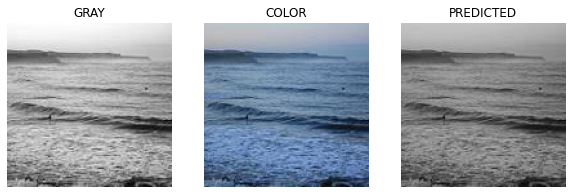

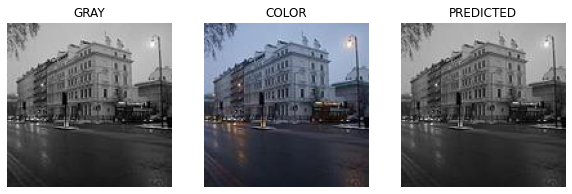

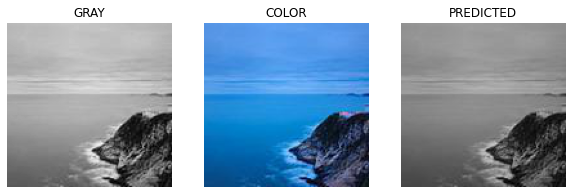

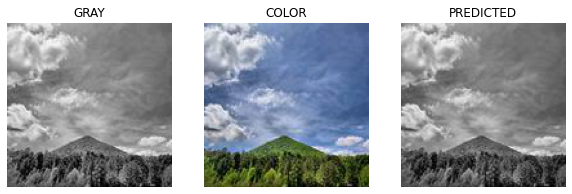

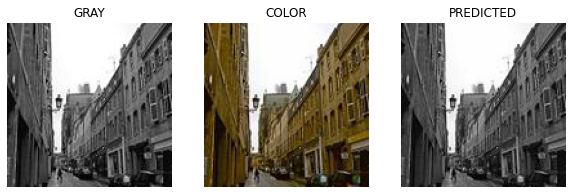

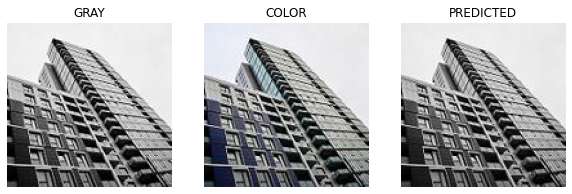

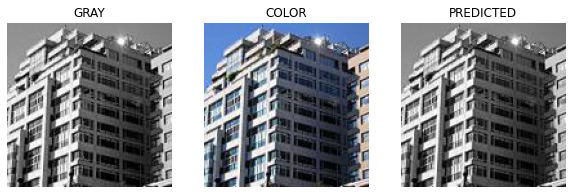

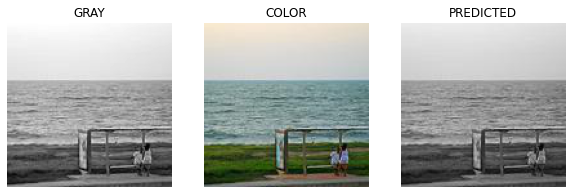

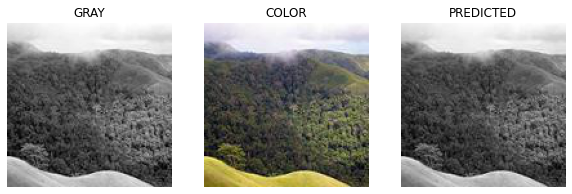

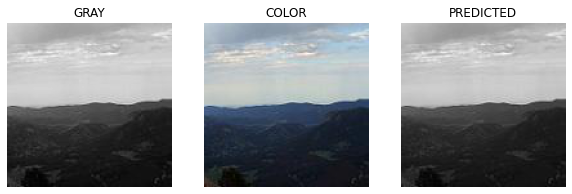

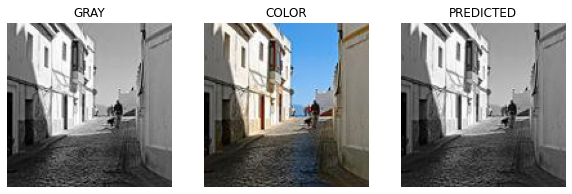

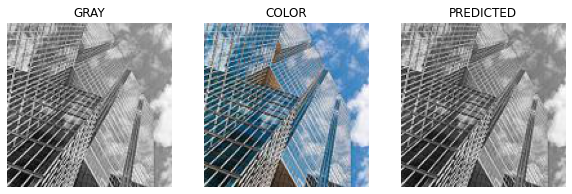

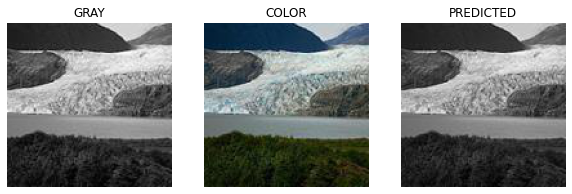

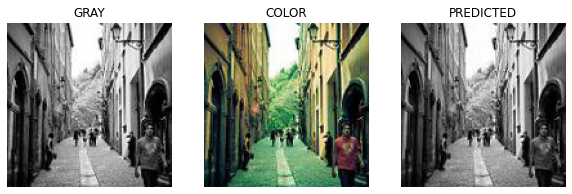

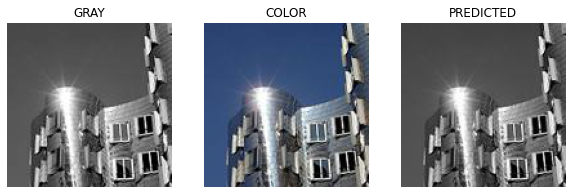

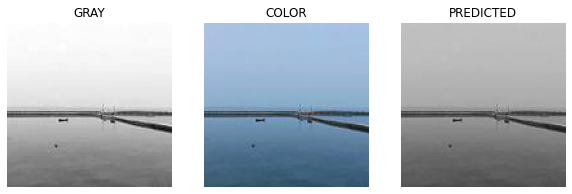

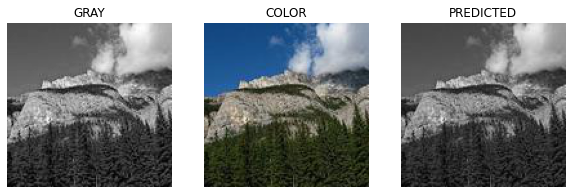

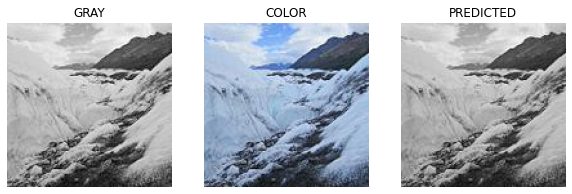

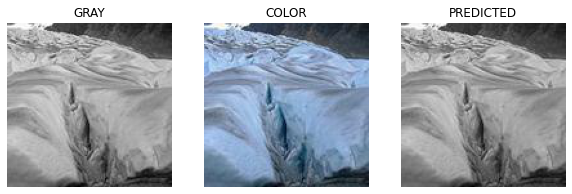

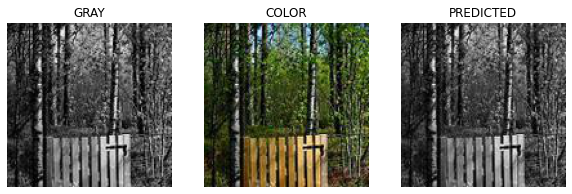

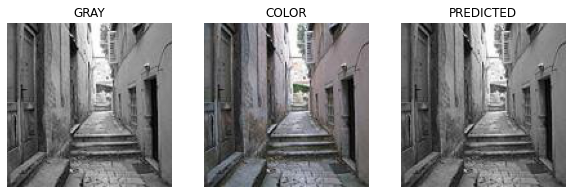

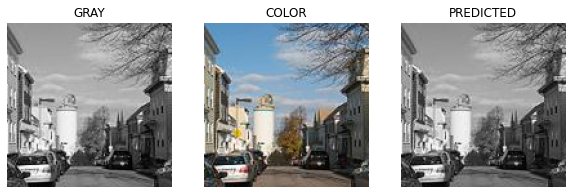

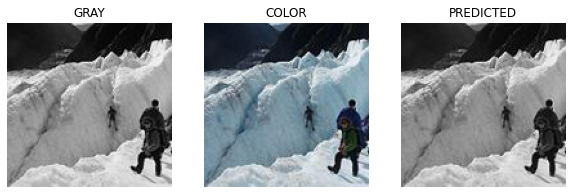

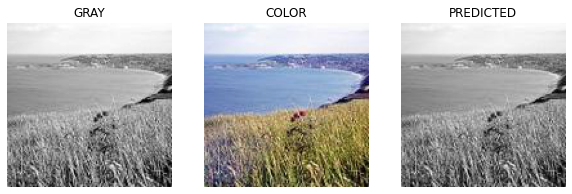

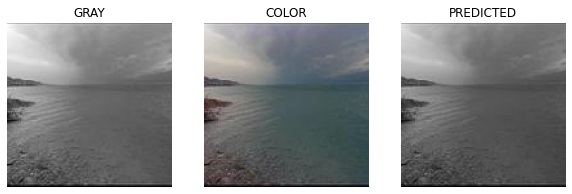

In [8]:
utils.plot_batch(device, test_loader, autoencoder, height=height, width=width, step = 1)
